In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [2]:
import torch
from torchvision import transforms, datasets

trainset = datasets.FashionMNIST('data/', train=True, download=True, transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))
testset = datasets.FashionMNIST('data/', train=False, download=True, transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

labels = trainset.classes

trainIter = torch.utils.data.DataLoader(trainset, batch_size=1000, shuffle=True, num_workers=1)
testIter = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=True, num_workers=1)

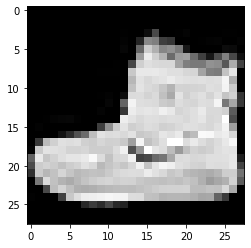

In [3]:
import matplotlib.pyplot as plt

plt.imshow(trainset[0][0].view(-1, 28), cmap='gray')

In [4]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 24, 5)
        self.conv2 = nn.Conv2d(24, 48, 5)
        
        x = torch.randn((28, 28)).view(-1, 1, 28, 28)
        x = self.convs(x)
        
        self.conv_out = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        
        self.fc1 = nn.Linear(self.conv_out, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, len(labels))
    
    def convs(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        
        return x
    
    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self.conv_out)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return F.softmax(x, dim=1)

In [6]:
net = Net()
print(net)

labelt = torch.tensor(np.eye(len(trainset.classes)), dtype=torch.float)

Net(
  (conv1): Conv2d(1, 24, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(24, 48, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=768, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [7]:
from tqdm.notebook import tqdm 
torch.backends.cudnn.benchmark = True

In [8]:
def test():
    net.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for data in tqdm(testIter):
            X, y = data
            output = net(X.view(-1, 1, 28, 28).to(device))
            for idx, i in enumerate(output):
                #print(torch.argmax(i), y[idx])
                if torch.argmax(i) == y[idx]:
                    correct += 1
                total += 1

    print("Accuracy: ", round(correct/total, 5))

In [9]:
device = torch.device('cuda:0')

net.to(device)
labelt.to(device)

optimizer = optim.Adam(net.parameters(), lr=0.01)
loss_function = nn.MSELoss()

epochs = 20
net.train()
for epoch in range(epochs):
    for data in tqdm(trainIter):
        
        X, y = data
        X = X.to(device).view(-1, 1, 28, 28)
        y = labelt[y].to(device)
        
        net.zero_grad()

        outputs = net(X)
        
        loss = loss_function(outputs, y.view(-1, len(labels)))
        loss.backward()
        optimizer.step()    # Does the update

    print(f"Epoch: {epoch}. Loss: {loss}")
    test()


Epoch: 0. Loss: 0.025799348950386047



Accuracy:  0.8252



Epoch: 1. Loss: 0.020989982411265373



Accuracy:  0.8603



Epoch: 2. Loss: 0.015268146991729736



Accuracy:  0.8805



Epoch: 3. Loss: 0.014601282775402069



Accuracy:  0.8917



Epoch: 4. Loss: 0.013461586087942123



Accuracy:  0.8968



Epoch: 5. Loss: 0.01310119591653347



Accuracy:  0.8853



Epoch: 6. Loss: 0.010383793152868748



Accuracy:  0.8986



Epoch: 7. Loss: 0.011630687862634659



Accuracy:  0.8991



Epoch: 8. Loss: 0.010928765870630741



Accuracy:  0.8984



Epoch: 9. Loss: 0.010761045850813389



Accuracy:  0.901



Epoch: 10. Loss: 0.011379200033843517



Accuracy:  0.897



Epoch: 11. Loss: 0.008329229429364204



Accuracy:  0.9042



Epoch: 12. Loss: 0.009926978498697281



Accuracy:  0.904



Epoch: 13. Loss: 0.009021993726491928



Accuracy:  0.8995



Epoch: 14. Loss: 0.007084586191922426



Accuracy:  0.9062



Epoch: 15. Loss: 0.009121072478592396



Accuracy:  0.903



Epoch: 16. Loss: 0.007588409353047609



Accuracy:  0.9069



Epoch: 17. Loss: 0.0072954879142344



Accuracy:  0.9006



Epoch: 18. Loss: 0.006400507874786854



Accuracy:  0.9024



Epoch: 19. Loss: 0.008270149119198322



Accuracy:  0.9039
